# Final Presentation Notebook

### Introduction

In my personal notebook, I analyze which neighboorhood was cleaned up the most to determine which one is the most environmentally safe. This will be done by analyzing the area covered in each neighborhood by clean-up crews. Then, I will combine that data with data from another data set that contains overall areas of each neighborhood to see which area was cleaned up the most. 

#### Step 1. Import all the datasets that must be used. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
beautify_pgh = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
neighborhoodData = pd.read_csv('neighborhoodData.csv')

#### Step 2. Here I will add up the areas covered by groups in each neighborhood and sort them from greatest to least. The first neighborhood would have had the most ground covered. 

In [21]:
# import pandas as pd
df = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
dataSetTwo = df[['Neighborhood','SHAPE_Area']]
#dataSetTwo = df.groupby('Neighborhood').mean().sort_values(['SHAPE_Area','Neighborhood'],ascending =[False,True])
#dataSetTwo['SHAPE_Area'] = dataSetTwo['SHAPE_Area']/4046.86
sortDataSetTwo = dataSetTwo.sort_values(by="Neighborhood")
df2 = sortDataSetTwo.groupby(['Neighborhood']).sum()
#mergedf2 = sortDataSetTwo.groupby(by=sortDataSetTwo.columns, axis=1).sum
#mergedf2 = sortDataSetTwo.groupby(['Neighborhood']).agg({'SHAPE_Area' : 'sum'})
#mergedf2
df2['SHAPE_Area'] = df2['SHAPE_Area']/4046.8564224
#df2
df2['Neighborhood'] = df2.index
df2.reset_index(drop=True)
columns_titles = ["Neighborhood","SHAPE_Area"]
df2=df2.reindex(columns=columns_titles)
df2=df2['SHAPE_Area'].rename_axis('Neighborhood').reset_index(name='area')
df2
##newdf =fire_incident['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')

,Neighborhood,area
0,Allegheny West,4.732557
1,Allentown,3.749644
2,Arlington,5.947094
3,Beltzhoover,23.596112
4,Bluff/Uptown,2.270216
5,Carrick,3.781603
6,Central Business District,9.649654
7,Central Oakland,50.399079
8,East Liberty,7.738735
9,Elliott,8.368664


In [8]:
##Step 3 extract the total amount of acres from neighborhood. 


import pandas as pd
neighborhoodData = pd.read_csv('neighborhoodData.csv')
df = neighborhoodData.sort_values(by = "hood")
dfaa = df[['hood','acres']]
df3 = dfaa.reset_index(drop=True)
df3

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


In [11]:
##name 
beautify_pgh = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')

##this chunk of data is just the data from step 2 copied over 
df = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
dataSetTwo = df[['Neighborhood','SHAPE_Area']]

sortDataSetTwo = dataSetTwo.sort_values(by="Neighborhood")
df2 = sortDataSetTwo.groupby(['Neighborhood']).sum()

df2['SHAPE_Area'] = df2['SHAPE_Area']/4046.8564224
#df2
df2['Neighborhood'] = df2.index
df2.reset_index(drop=True)
columns_titles = ["Neighborhood","SHAPE_Area"]
df2=df2.reindex(columns=columns_titles)
df2=df2['SHAPE_Area'].rename_axis('Neighborhood').reset_index(name='area')
df2

###end of copied over data 

newdf =beautify_pgh['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='area')
sorteddf = newdf.sort_values(["Neighborhood"], ascending=True)
sortednew = sorteddf.reset_index(drop=True)
mergesorteddata = sortednew.merge(df3, how = 'left', left_on = 'Neighborhood', right_on = 'hood', suffixes=('area', 'acres'))
mergesorteddata.sort_values(['area'], ascending=True)
mergesorteddata['ratio'] = mergesorteddata['area'] / mergesorteddata['acres']
ratio = mergesorteddata.sort_values(["ratio"], ascending=True)
addcol = df2['area']
ratio.insert(1, 'shapearea', addcol)
ratio['realratio'] = ratio['shapearea'] / ratio['acres']
del ratio["area"]
del ratio["hood"]
del ratio["ratio"]
ratio
ratio = ratio.sort_values(["realratio"], ascending=True)
ratio

,Neighborhood,shapearea,acres,realratio
11,Hazelwood,2.810837,1017.805,0.002762
5,Carrick,3.781603,1075.670,0.003516
19,Sheraden,3.959767,572.125,0.006921
10,Greenfield,3.894347,497.028,0.007835
18,Shadyside,6.987445,592.104,0.011801
17,Point Breeze,10.301870,645.695,0.015955
12,Homewood South,4.766865,256.093,0.018614
2,Arlington,5.947094,302.320,0.019672
1,Allentown,3.749644,189.608,0.019776
8,East Liberty,7.738735,373.650,0.020711


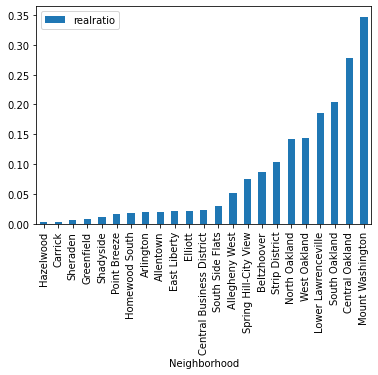

In [20]:
## this is a graph visual 
plot = ratio.head(23).plot.bar(x='Neighborhood', y='realratio')

### Conclusion

According to my notebook, the neighborhood with the largest area cleaned to area ratio is Mount Washington and the least is Hazelwood. Since my metrics are different, my conclusions are different to the other notebooks because of the metrics. My metric was using the dataset to find out which neighborhood was the cleanest by doing the area of the cleaning and dividing it by the total area of the neighborhood. Through that I was able to create the ratio and compare the neighborhoods. Additionally, my dataset did not contain as many neighborhoods because certain areas had more access to more volunteers available for clean-up. 